In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lokeshchidagam","key":"9637a18e826b18ae0f576109bb54437a"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [ ]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
 99% 2.82G/2.84G [00:14<00:00, 204MB/s]
100% 2.84G/2.84G [00:14<00:00, 205MB/s]


In [ ]:
# !mv a* /content/ar.zip
!unzip /content/fresh-and-stale-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_5372.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_54.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6186.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6285.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6551.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6565.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6985.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7173.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7306.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp 

In [ ]:
list_dir = []
def load_rand():
    X=[]
    dir_path='dataset/Train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        list_dir.append(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X

In [ ]:
dir_path='dataset/Train'
dir_path_test='dataset/Test'

In [ ]:
!rm -rf dataset/Train/freshcapsicum
!rm -rf dataset/Train/rottencapsicum
!rm -rf dataset/Train/freshbittergroud
!rm -rf dataset/Train/rottenbittergroud


In [ ]:
!mv fres

mv: missing destination file operand after 'fres'
Try 'mv --help' for more information.


In [ ]:
X=load_rand()
X=np.array(X)
X.shape

 50%|█████     | 7/14 [00:00<00:00, 58.07it/s]

freshcucumber
freshapples
rottenapples
freshpotato
rottencucumber
rottenpotato
freshbanana
rottenokra
rottenoranges
rottentomato
freshokra
rottenbanana
freshoranges


100%|██████████| 14/14 [00:00<00:00, 61.58it/s]

freshtomato


(84, 100, 100, 3)

In [ ]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=list_dir
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

In [ ]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(dir_path)):
        if quality[0] in cata:
            path_main=os.path.join(dir_path,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(dir_path,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X,Y=load_rottenvsfresh()
Y=np.array(Y)
X=np.array(X)
y_ser=pd.Series(Y)
y_ser.value_counts()

100%|██████████| 14/14 [00:55<00:00,  3.98s/it]


Shuffling your data.....


100%|██████████| 21044/21044 [00:00<00:00, 2104602.72it/s]


,count
1,11161
0,9883


In [ ]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(dir_path)):
        if quality[0] in cata:
            path_main=os.path.join(dir_path_test,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(dir_path_test,cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
!mv dataset/Test/freshtamto dataset/Test/freshtomato
!mv dataset/Test/freshpatato dataset/Test/freshpotato
!mv dataset/Test/rottentamto dataset/Test/rottentomato
!mv dataset/Test/rottenpatato dataset/Test/rottenpotato
X_val,Y_val=load_rottenvsfresh_valset()

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]


Shuffling your data.....


100%|██████████| 6738/6738 [00:00<00:00, 1884709.59it/s]


In [ ]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

,count
1,3493
0,3245


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, SeparableConv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.initializers import HeUniform

In [ ]:
mobilenetv2_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers in the MobileNetV2 model
for layer in mobilenetv2_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential(layers=[tf.keras.layers.InputLayer(input_shape=(100, 100, 3))])

# Add the MobileNetV2 model to the new model (up to the last convolutional layer)
model.add(mobilenetv2_model)
kernel_initializer = HeUniform()

# Add the rest of the custom layers
model.add(BatchNormalization())
model.add(SeparableConv2D(64, (3, 3), depthwise_initializer=kernel_initializer, pointwise_initializer=kernel_initializer, padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), depthwise_initializer=kernel_initializer, pointwise_initializer=kernel_initializer, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer=kernel_initializer, padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer=kernel_initializer, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=kernel_initializer))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

9406464/9406464 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 batch_normalization (Batch  (None, 4, 4, 1280)        5120      
 Normalization)                                                  
                                                                 
 separable_conv2d (Separabl  (None, 4, 4, 64)          93504     
 eConv2D)                                                        
                                                                 
 separable_conv2d_1 (Separa  (None, 4, 4, 64)          4736      
 bleConv2D)                                                      
                                                                 
 batch_normalization_1 (Bat  (None, 4, 4, 64)          2

In [ ]:
import keras
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)

check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath='modelcheckpt.keras',  # Changed the file extension to .keras
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,  # Saving the entire model
    mode='min'
)

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [ ]:
X=X/255.0
X_val=X_val/255.0

In [ ]:

history=model.fit(X,Y,batch_size=2,validation_data=(X_val,Y_val),epochs= 10,
                 callbacks=[check_point])

Epoch 1/10
10520/10522 [============================>.] - ETA: 0s - loss: 0.4635 - accuracy: 0.7829
Epoch 1: val_loss improved from inf to 0.27677, saving model to modelcheckpt.keras
10522/10522 [==============================] - 234s 22ms/step - loss: 0.4635 - accuracy: 0.7830 - val_loss: 0.2768 - val_accuracy: 0.8765
Epoch 2/10
10519/10522 [============================>.] - ETA: 0s - loss: 0.2896 - accuracy: 0.8842
Epoch 2: val_loss improved from 0.27677 to 0.19123, saving model to modelcheckpt.keras
10522/10522 [==============================] - 226s 21ms/step - loss: 0.2896 - accuracy: 0.8842 - val_loss: 0.1912 - val_accuracy: 0.9170
Epoch 3/10
10520/10522 [============================>.] - ETA: 0s - loss: 0.2277 - accuracy: 0.9117
Epoch 3: val_loss improved from 0.19123 to 0.16286, saving model to modelcheckpt.keras
10522/10522 [==============================] - 226s 21ms/step - loss: 0.2277 - accuracy: 0.9118 - val_loss: 0.1629 - val_accuracy: 0.9351
Epoch 4/10
10520/10522 [=====

In [ ]:
model.evaluate(X_val,Y_val)

211/211 [==============================] - 11s 48ms/step - loss: 0.0855 - accuracy: 0.9685


[0.08549313247203827, 0.9685366749763489]

In [ ]:
model.save('rottenvsfresh.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras
from keras.models import Model, load_model
import tensorflow as tf
#load the saved model
new_model = load_model('/content/rottenvsfresh.h5')
#make a prediction using the loaded model
new_model.predict(X_val[1].reshape(1,100,100,3))

1/1 [==============================] - 1s 838ms/step


array([[0.04779498]], dtype=float32)

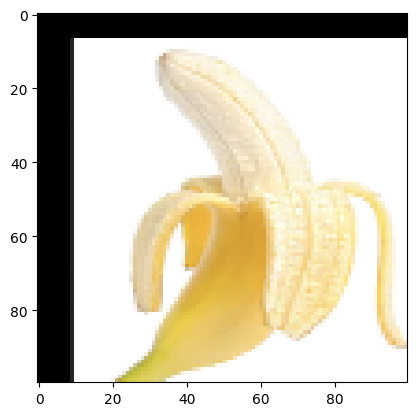

In [ ]:
plt.imshow(X_val[123])

In [ ]:
model.predict(X_val[123].reshape(1,100,100,3))

1/1 [==============================] - 0s 33ms/step


array([[0.01154482]], dtype=float32)